In [13]:
# Import the dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes abd longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
cities = []
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e422f1b46ff65ddd19a2a1fe9686417c


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | charters towers
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | nouadhibou
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | shelburne
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | qasigiannguit
Processing Record 15 of Set 1 | nanakuli
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | klaksvik
Processing Record 23 of Set 1 | tiksi
Processing Record 24 of Set 1 | vryburg
Processing Re

Processing Record 38 of Set 4 | vanavara
Processing Record 39 of Set 4 | pisco
Processing Record 40 of Set 4 | tongzhou
Processing Record 41 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 4 | manzhouli
Processing Record 43 of Set 4 | castro
Processing Record 44 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 45 of Set 4 | sangod
Processing Record 46 of Set 4 | pacific grove
Processing Record 47 of Set 4 | caravelas
Processing Record 48 of Set 4 | sola
Processing Record 49 of Set 4 | isabela
Processing Record 50 of Set 4 | namibe
Processing Record 1 of Set 5 | andselv
City not found. Skipping...
Processing Record 2 of Set 5 | dubbo
Processing Record 3 of Set 5 | okoneshnikovo
Processing Record 4 of Set 5 | cabo san lucas
Processing Record 5 of Set 5 | xambioa
Processing Record 6 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 5 | bulgan
Processing Record 8 of Set 5 | grindavik
Processing Record 9 of Set 5 |

Processing Record 25 of Set 8 | funadhoo
Processing Record 26 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 27 of Set 8 | zhaotong
Processing Record 28 of Set 8 | matagami
Processing Record 29 of Set 8 | sorland
Processing Record 30 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 31 of Set 8 | zambezi
Processing Record 32 of Set 8 | mana
Processing Record 33 of Set 8 | bonthe
Processing Record 34 of Set 8 | tuatapere
Processing Record 35 of Set 8 | pochutla
Processing Record 36 of Set 8 | high prairie
Processing Record 37 of Set 8 | bang sao thong
Processing Record 38 of Set 8 | kostino
Processing Record 39 of Set 8 | ponta do sol
Processing Record 40 of Set 8 | tabory
Processing Record 41 of Set 8 | jabinyanah
Processing Record 42 of Set 8 | myaundzha
Processing Record 43 of Set 8 | high level
Processing Record 44 of Set 8 | kungur
Processing Record 45 of Set 8 | kysyl-syr
Processing Record 46 of Set 8 | abnub
Processing Record 47 of Set 8 | brok

Processing Record 14 of Set 12 | port keats
Processing Record 15 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 16 of Set 12 | port hawkesbury
Processing Record 17 of Set 12 | pemba
Processing Record 18 of Set 12 | cockburn town
Processing Record 19 of Set 12 | bor
Processing Record 20 of Set 12 | chagda
City not found. Skipping...
Processing Record 21 of Set 12 | mounana
Processing Record 22 of Set 12 | umm kaddadah
Processing Record 23 of Set 12 | taburi
City not found. Skipping...
Processing Record 24 of Set 12 | cascais
Processing Record 25 of Set 12 | chaoyang
Processing Record 26 of Set 12 | kalianget
Processing Record 27 of Set 12 | muravlenko
Processing Record 28 of Set 12 | borogontsy
Processing Record 29 of Set 12 | rolante
Processing Record 30 of Set 12 | goderich
Processing Record 31 of Set 12 | saint-francois
Processing Record 32 of Set 12 | san ignacio
Processing Record 33 of Set 12 | aasiaat
Processing Record 34 of Set 12 | poso
Processing Record

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Charters Towers,-20.1000,146.2667,90.34,29,100,4.97,AU,2021-11-23 01:58:20
1,Bredasdorp,-34.5322,20.0403,53.28,76,44,6.33,ZA,2021-11-23 01:55:01
2,Bluff,-46.6000,168.3333,55.60,68,45,12.28,NZ,2021-11-23 01:58:20
3,Qaanaaq,77.4840,-69.3632,-6.36,85,98,5.30,GL,2021-11-23 01:58:21
4,Mar Del Plata,-38.0023,-57.5575,58.08,69,20,3.00,AR,2021-11-23 01:55:52
5,Chuy,-33.6971,-53.4616,66.36,63,12,17.45,UY,2021-11-23 01:58:21
6,Nouadhibou,20.9310,-17.0347,71.58,68,0,6.91,MR,2021-11-23 01:58:22
7,Tasiilaq,65.6145,-37.6368,14.58,60,94,9.15,GL,2021-11-23 01:58:22
8,Dikson,73.5069,80.5464,-11.54,94,100,17.74,RU,2021-11-23 01:58:22
9,Shelburne,44.0787,-80.2041,27.05,96,36,11.95,CA,2021-11-23 01:58:23


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speeds = city_data_df["Wind Speed"]

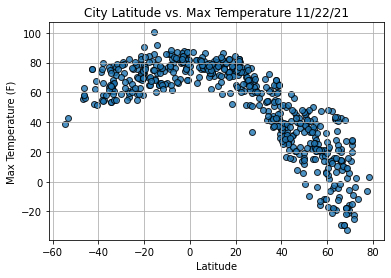

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

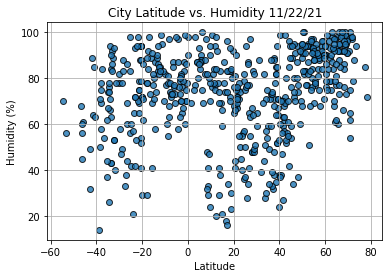

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

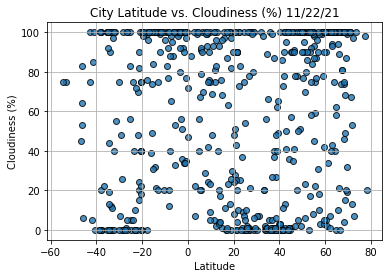

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

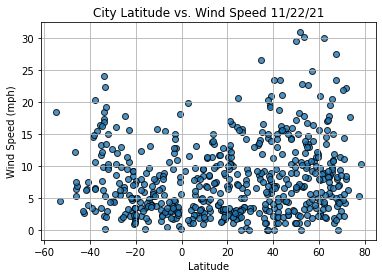

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speeds,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()